In [1]:
import PIL.Image as Image
import numpy as np

In [2]:
img = Image.open('sample.jpg')
img = img.convert('LA')

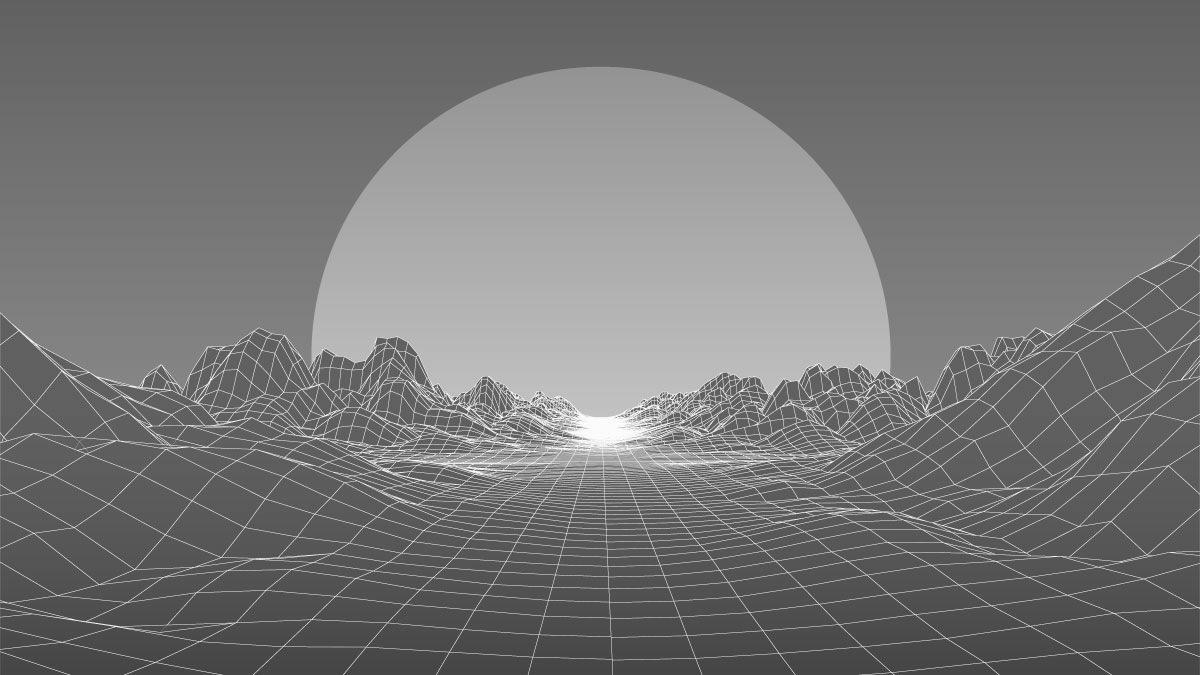

In [3]:
img

In [22]:
def conv2d(img, kernel):
    res_img_w, res_img_h, res_img_c = (img.shape[0] - kernel.shape[0] + 1, img.shape[1] - kernel.shape[1] + 1, kernel.shape[2])
    result = np.zeros(shape = (res_img_w, res_img_h, res_img_c))
    for c in range(res_img_c):
        for y in range(res_img_h):
            for x in range(res_img_w):
                img_part = img[x : x + kernel.shape[0], y : y + kernel.shape[1]]
                img_res = np.sum(img_part * kernel[:, :, c])
                result[x, y, c] = img_res
    return result

In [23]:
kernel = np.random.normal(size = [3, 3, 5])

<b> Normalization </b>

In [24]:
img_arr = np.array(img)[:, :, 0] / 255.

In [25]:
res_conv = conv2d(img_arr, kernel)

In [26]:
res_conv.shape

(673, 1198, 5)

In [27]:
def batch_norm(img):
    mean = np.mean(img)
    std = np.std(img)
    return (img - mean) / std

In [28]:
res_bn = batch_norm(res_conv)

In [29]:
res_bn.shape

(673, 1198, 5)

In [30]:
def max_pool(img, kernel_size = (3,3)):
    res_img_w, res_img_h, res_img_c = (img.shape[0] - kernel_size[0], img.shape[1] - kernel_size[1], img.shape[2])
    result = np.zeros(shape = (res_img_w, res_img_h, res_img_c))
    for y in range(res_img_h):
        for x in range(res_img_w):
            img_part = img[x : x + kernel_size[0], y : y + kernel_size[1], :]
            img_res = np.max(img_part, axis = (0, 1))
            result[x, y] = img_res
    return result

In [31]:
res_max_pool = max_pool(res_bn, (10, 10))

In [32]:
res_max_pool.shape

(663, 1188, 5)

In [46]:
def softmax(matrix):
    exps = np.exp(matrix - np.max(matrix))
    return exps / exps.sum(axis = 0)

In [47]:
res_sm = np.ones_like(res_max_pool)
for i in range(res_max_pool.shape[0]):
    for j in range(res_max_pool.shape[1]):
        res_sm[i, j, :] = softmax(res_max_pool[i,j,:])

In [49]:
print(res_sm[0,0,:])
print(res_sm[100,1,:])

[0.09455743 0.07361811 0.08205265 0.12624958 0.62352223]
[0.08347332 0.0633547  0.07138537 0.11440109 0.66738553]


In [56]:
res_sm.sum(axis = 2)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [57]:
res_sm.shape

(663, 1188, 5)